In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("Real Estate Data V21.csv")

In [3]:
# Basic info
print("Shape of dataset:", df.shape)
print("Dataset Info:")
print(df.info())
print("Missing values per column:\n", df.isnull().sum())

Shape of dataset: (14528, 9)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB
None
Missing values per column:
 Name              0
Property Title    0
Price             0
Location          0
Total_Area        0
Price_per_SQFT    0
Description       0
Baths             0
Balcony           0
dtype: int64


In [4]:
# First few rows
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
                                      Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1     Ramanathan Nagar, Pozhichalur,Chennai        7000          3210.0   
2  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
3

In [5]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
         Total_Area  Price_per_SQFT         Baths
count  14528.000000    14528.000000  14528.000000
mean    1297.916988    11719.456222      2.751239
std     1245.694305    49036.068632      0.898243
min       70.000000        0.000000      1.000000
25%      650.000000     4480.000000      2.000000
50%     1000.000000     6050.000000      3.000000
75%     1439.000000     9312.500000      3.000000
max    35000.000000   999000.000000      6.000000


In [6]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 8


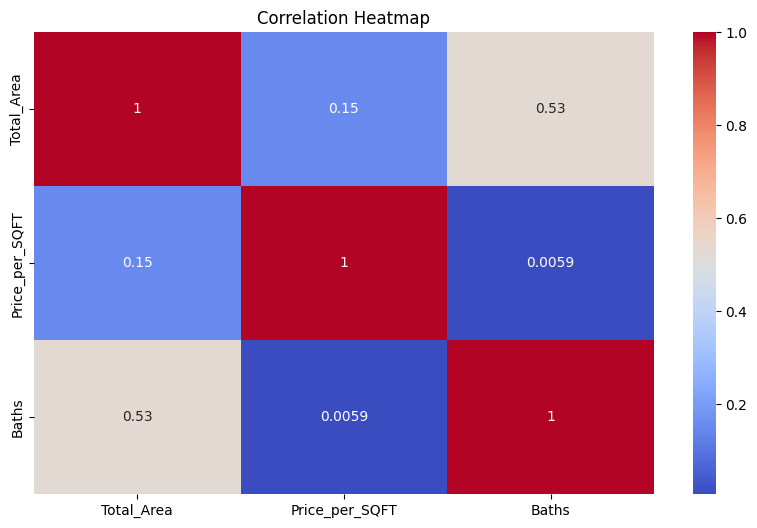

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

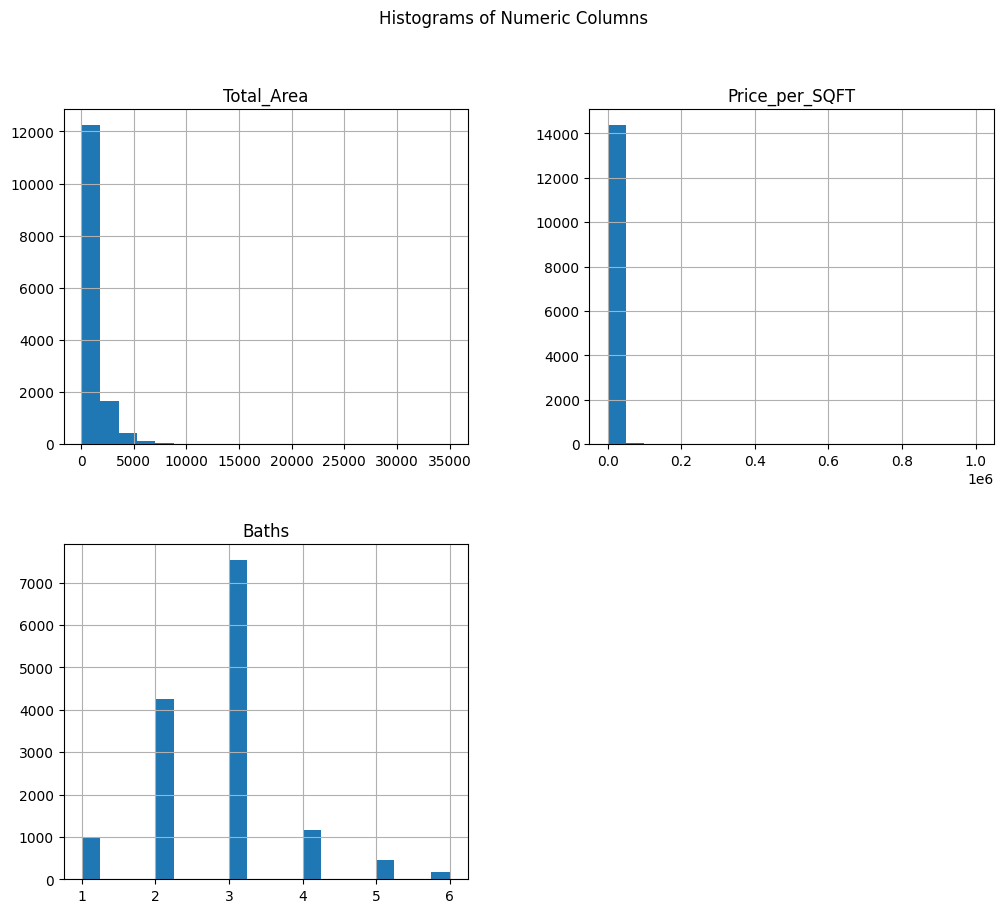

In [8]:
# Distribution of each numeric column
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Numeric Columns")
plt.show()

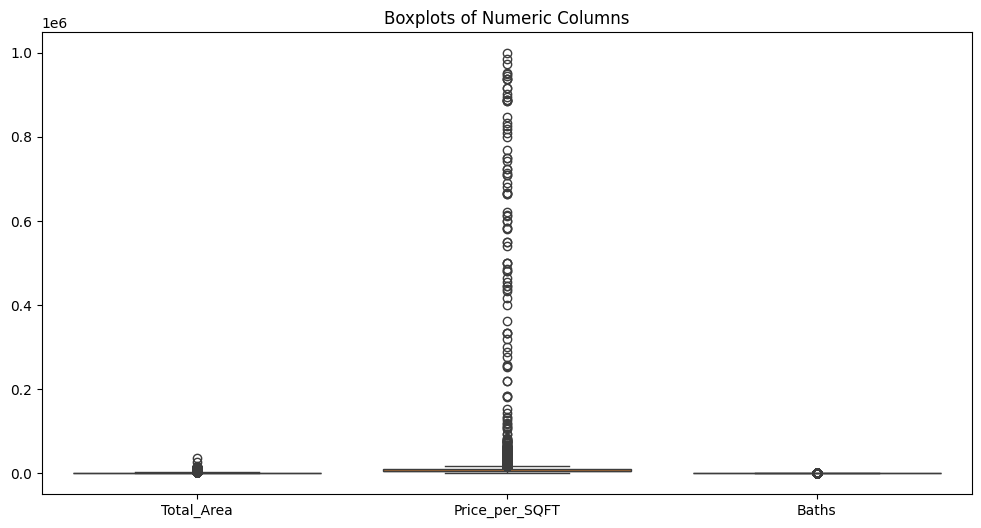

In [9]:
# Boxplots to check outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplots of Numeric Columns")
plt.show()

In [11]:
# Handle Missing Values
print("\nMissing values per column:\n", df.isnull().sum())

# Fill numeric missing values with median
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


Missing values per column:
 Name              0
Property Title    0
Price             0
Location          0
Total_Area        0
Price_per_SQFT    0
Description       0
Baths             0
Balcony           0
dtype: int64


/tmp/ipython-input-1710006241.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1710006241.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [14]:

def clean_area(area):
    try:
        area = str(area).lower().strip()
        if "sqft" in area:
            return float(area.replace("sqft","").strip())
        elif "acs" in area or "acre" in area:
            return float(area.replace("acs","").replace("acre","").strip()) * 43560
        else:
            return float(area)  # if only number
    except:
        return None


In [15]:
# Apply cleaning
df["Total_Area_clean"] = df["Total_Area"].apply(clean_area)

# Replace original column if needed
df["Total_Area"] = df["Total_Area_clean"]
df.drop(columns=["Total_Area_clean"], inplace=True)

print(df[["Total_Area"]].head())

   Total_Area
0      2583.0
1      7000.0
2      1320.0
3      4250.0
4       960.0


In [16]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors="ignore")

/tmp/ipython-input-2008613474.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


In [17]:
# Display first 10 values of Total_Area after conversion
print(df["Total_Area"].head(10))

df["Total_Area_raw"] = df["Total_Area"].astype(str)   # store as string for comparison
df["Total_Area_clean"] = df["Total_Area"].apply(clean_area)

print(df[["Total_Area_raw", "Total_Area_clean"]].head(10))


0    2583.0
1    7000.0
2    1320.0
3    4250.0
4     960.0
5     940.0
6     880.0
7    1700.0
8     840.0
9     535.0
Name: Total_Area, dtype: float64
  Total_Area_raw  Total_Area_clean
0         2583.0            2583.0
1         7000.0            7000.0
2         1320.0            1320.0
3         4250.0            4250.0
4          960.0             960.0
5          940.0             940.0
6          880.0             880.0
7         1700.0            1700.0
8          840.0             840.0
9          535.0             535.0


Shape: (14528, 9)
Columns: Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')
                                      Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0  

/tmp/ipython-input-1111442767.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)   # simple forward fill


Shape after cleaning: (14526, 11)
Any NaN in target column?: 0
Linear Regression Results
Mean Squared Error: 20448.381567669538
R² Score: 0.28279189242633607

Feature Coefficients:
            Feature  Coefficient
3  Total_Area_clean    68.151006
1    Property Title    24.175461
6           Balcony     5.516605
0              Name    -0.049959
5             Baths    -0.382676
2          Location    -0.434005
4    Price_per_SQFT    -4.245544


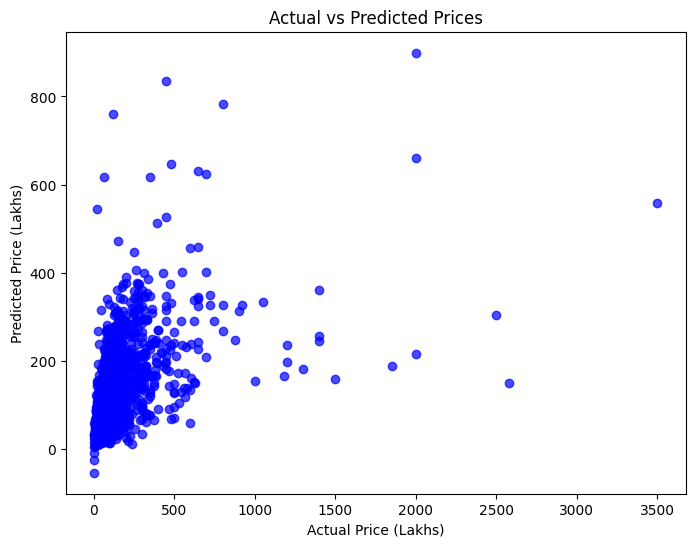

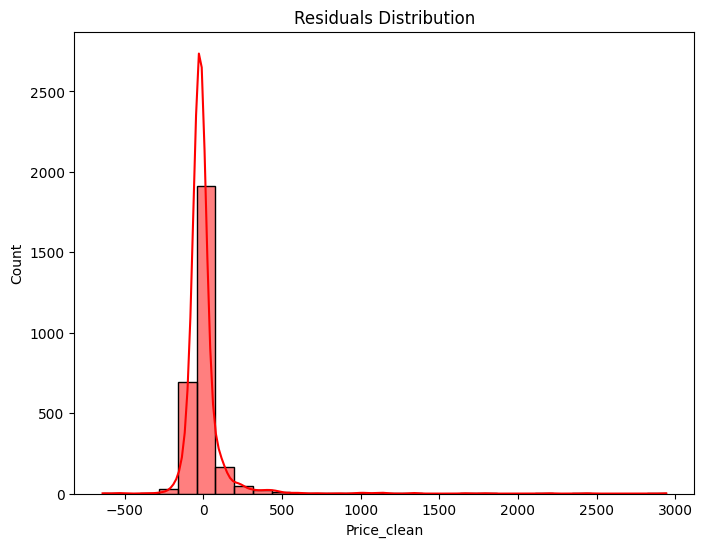

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("Real Estate Data V21.csv")

# Inspect dataset
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Clean Price column (₹ + L/Cr to numeric in Lakhs)
def convert_price(price):
    try:
        price = str(price).replace("₹","").strip()
        if "Cr" in price:
            return float(price.replace("Cr","").strip()) * 100   # 1 Cr = 100 Lakhs
        elif "L" in price:
            return float(price.replace("L","").strip())          # Already in Lakhs
        else:
            return float(price)
    except:
        return None

df["Price_clean"] = df["Price"].apply(convert_price)

# Clean Total_Area column (sqft / acres to sqft)
def clean_area(area):
    try:
        area = str(area).lower().strip()
        if "sqft" in area:
            return float(area.replace("sqft","").strip())
        elif "acs" in area or "acre" in area:
            return float(area.replace("acs","").replace("acre","").strip()) * 43560
        else:
            return float(area)
    except:
        return None

df["Total_Area_clean"] = df["Total_Area"].apply(clean_area)

# Encode categorical columns
le = LabelEncoder()
for col in ["Name","Property Title","Location","Description","Balcony"]:
    df[col] = le.fit_transform(df[col].astype(str))

# Drop rows where Price_clean or Total_Area_clean is missing
df = df.dropna(subset=["Price_clean", "Total_Area_clean"])

# Reset index
df = df.reset_index(drop=True)

print("Shape after cleaning:", df.shape)
print("Any NaN in target column?:", df["Price_clean"].isnull().sum())


# Select Features (X) and Target (y)
X = df[["Name","Property Title","Location","Total_Area_clean","Price_per_SQFT","Baths","Balcony"]]
y = df["Price_clean"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Linear Regression Results")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:")
print(coef_df.sort_values(by="Coefficient", ascending=False))

# Visualization - Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted Prices")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color="red")
plt.title("Residuals Distribution")
plt.show()
